# Hola Gelber!

Mi nombre es David Bautista, soy code reviewer de Tripleten y hoy tengo el gusto de revisar tu proyecto.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - por favor, no los muevas, no los modifiques ni los borres.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, Gelber, sería interesante poder estructurar una introducción del proyecto. </div>

### Introduccion

acontinuacion realizaremos el siguiente ejercicio el cual corresponde al proyecto sprint numero 6.en este proyecto tocaremos dos temas:

1) El primero es un dataframe con la cantidad de viajes que se realizaron por cada compañia de taxis de la ciudad. en el mostraremos cuales fueron las compañias con mayor numero de viajes para los dias 15 & 16 de nov.

2) dataframe 2 corresponde " Viajes" corresponde a las ubicaciones donde termiaron los viajes de los usuarios. observaremos cuales son los barrios donde mas servicios llevan los taxistas en Chicago

3) Dataframe con el tipo de clima que hace los sabados del mes de noviembre y si esto afecta la movilidad para ir al aeropuesto en ese dia en mencion . realizaremos una Hiootesis nula y una alternativa.


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats as st


In [47]:
companinames = pd.read_csv('/datasets/project_sql_result_01.csv')
travels = pd.read_csv("/datasets/project_sql_result_04.csv")

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

~~Hola, Gelber, buen trabajo; sin embargo, sería ideal poder dejar en ellas aparte el importe de las librerías y el cargue de los datos.~~ ⁣ </div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Perfecto, gracias por tener en cuenta mi comentario. 😄 </div>

### Paso 4. Análisis exploratorio de datos (Python)

company_name: nombre de la empresa de taxis trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

In [2]:
companinames

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [3]:
companinames.duplicated().sum()

0

Lo primero que realice fue ver la informacion de posibles duplicados. de igual manera valide que la columna trips_amount fuera tipo de datos enteros.

company_name: nombre de la empresa de taxis
trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

In [46]:
viajes=companinames.groupby(["company_name"])["trips_amount"].sum().sort_values(ascending=[False])
print(viajes.head(10))


company_name
Flash Cab                            19558
Taxi Affiliation Services            11422
Medallion Leasing                    10367
Yellow Cab                            9888
Taxi Affiliation Service Yellow       9299
Chicago Carriage Cab Corp             9181
City Service                          8448
Sun Taxi                              7701
Star North Management LLC             7455
Blue Ribbon Taxi Association Inc.     5953
Name: trips_amount, dtype: int64


In [45]:
companinames.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [27]:
companinames.isnull().sum()

trips_amount    0
dtype: int64

Podemos observar que el dataframe companinames No contiene nuingun valor nulo. por otro lado observamos que la compañia con menos numero de vaijes fue 3556 - 36214 RC Andrews Cab  con solo 2 viajes . el 75 % de las compañias  de taxis obtuvieron por debajo de 2106 viajes entre los dos dias.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

~~Buen trabajo con la exploración inicial de los datos; sin embargo, sería interesante poder agregar algunos aspectos adicionales como la revisión de valores nulos o el uso de métodos como ``describe()``.~~  ⁣ </div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Buen trabajo con la exploración de los datos!</div>

Me causo curiusidad que algunos nombres de compañias de taxis tenian un numero al inicio, queria validar que los nombres no estuvieran duplicados . por tal razon imprimi todos los datos para asi validar que no hubiera duplicados en noombres de las compañias.

In [6]:
companinames.set_index("company_name",inplace=True)

Realice el set.index en la columna "company_name" para que al hacer la grafica de barras los nombres de las columnas aparecieran en la grafica

identificar los 10 principales barrios en términos de finalización del recorrido

In [50]:
print(viajes.head(10))

company_name
Flash Cab                            19558
Taxi Affiliation Services            11422
Medallion Leasing                    10367
Yellow Cab                            9888
Taxi Affiliation Service Yellow       9299
Chicago Carriage Cab Corp             9181
City Service                          8448
Sun Taxi                              7701
Star North Management LLC             7455
Blue Ribbon Taxi Association Inc.     5953
Name: trips_amount, dtype: int64


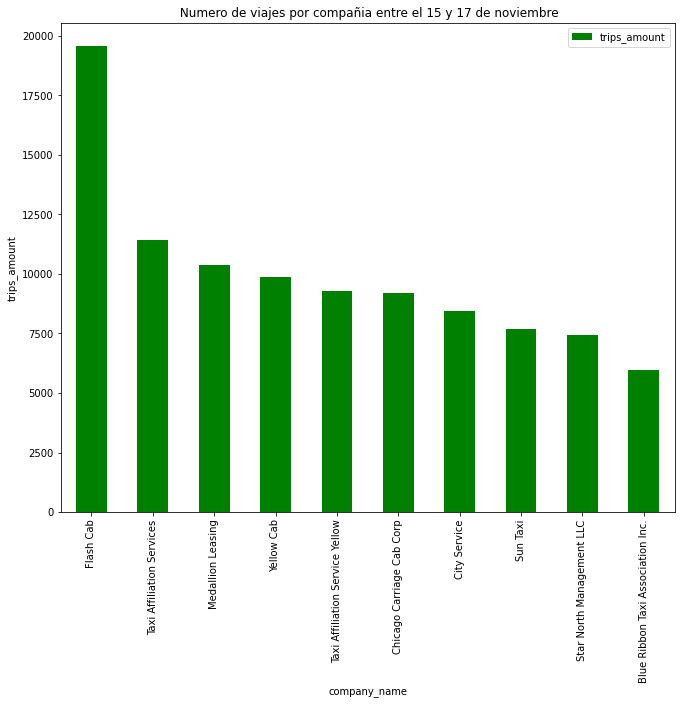

In [40]:
companinames.head(10).plot(kind="bar",
                          title= " Numero de viajes por compañia entre el 15 y 17 de noviembre",
                          xlabel= "company_name",
                          ylabel= "trips_amount",
                          figsize = (11, 9),
                          color = "green") 
plt.show()


Podemos observar los 10 primeras compañias con mayor numero de viajes entre las fechas 15 y 17 de noviembre. la compañia que mayor viajes realiza es Flash Cab con 19558 viajes. seguida de Taxi Affiliation Services con 11422 viajes.

hay una diferencia bastante grande entre el 1 y el 2. validando posiblemente esta diferencia se debe a la flota de automoviles que maneja la compañia Flash Cab la cual es de autos mas nuevos y confortables

In [9]:
travels

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [10]:
travels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


En el data frame Travels qe corresponde al promedio de  viajes que se hicieron a los distintos barrios de chicago , la columna 
average_trips fue cambiados los datos de float64 a enteros.

In [11]:
travels["average_trips"] = travels["average_trips"].astype("float").astype("int")

para el dataframe Travels la columna "average_trips" fue cambiada de datos float a enteros. por otro lado la se realizo el set_index en la columna "dropoff_location_name" con el fin de que los nombres de los barrios aparezcan en el grafico de barras

In [12]:
travels.set_index("dropoff_location_name",inplace=True)

dropoff_location_name: barrios de Chicago donde finalizaron los viajes
average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

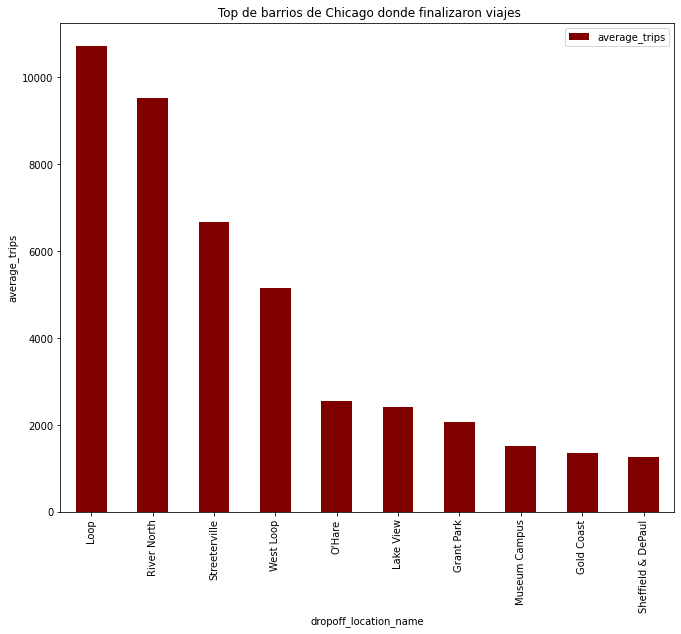

In [41]:
travels.head(10).plot(kind="bar",
                      figsize = (11, 9),
                          title= " Top de barrios de Chicago donde finalizaron viajes",
                      color ='maroon',
                          ylabel= "average_trips",
                          xlabel= "dropoff_location_name"),
                     
plt.show()



a continuacion se muestra en la grafica los barrios donde los servicios de taxis fianlizaron con la mayor proporcion:
Loop	10727 Viajes,
River North	9523 Viajes,
Streeterville	6664 Viajes.

se evidencia mayor terminacion de viajes en el sector de  The Loop ya que es una zona animada con restaurantes eclécticos, tiendas, teatros y parques. Compuesto principalmente de rascacielos, también alberga la Torre Willis de 108 pisos. La icónica escultura "Cloud Gate" se encuentra en el Parque Millennium. 

 por otro lado River North el cual tiene el top # 2 es un animado vecindario en Near North Side. Cuenta con tiendas y restaurantes de lujo, además de elegantes clubes nocturnos y bares de cócteles. 
 
 por tal razon el top de estos dos barrios es por su popularidad en atracciones de visita, muchos turistas que visitan chicago quieren conocer estos barrios ya que son los mas populares.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

~~Realizas un buen trabajo desarrollando las dos gráficas en esta sección; sin embargo, te comentaré algunos aspectos que se pueden tener en cuenta para mejorar el contenido.~~

- ~~Podrías pensar en usar un formato horizontal de los barplots, de modo que se invierten los ejes y se pueden leer las categorías de una mejor manera.~~
    
- ~~Los gráficos son muy buenos, si es posible aumentar el tamaño y aprovechar de mejor manera el espacio notebook sería fantástico.~~

</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Buen trabajo Gelber, nuevamente gracias por tener en cuenta mi comentario. 😄 </div>

### Paso 5. Prueba de hipótesis (Python)

— el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:
start_ts: fecha y hora de la recogida
weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
duration_seconds: duración del viaje en segundos
Prueba la hipótesis:
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
Decide por tu cuenta dónde establecer el nivel de significación (alfa).
Explica:
cómo planteaste las hipótesis nula y alternativa
qué criterio usaste para probar las hipótesis y por qué

### Paso 5. Prueba de hipótesis (Python)

In [14]:
loopfromairport = pd.read_csv("/datasets/project_sql_result_07.csv")

In [15]:
loopfromairport

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [16]:
loopfromairport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [17]:
loopfromairport['start_ts'] = pd.to_datetime(loopfromairport['start_ts'], format='%Y-%m-%d')
loopfromairport['week'] =loopfromairport['start_ts'].dt.weekday

In [18]:
loopfromairport

,start_ts,weather_conditions,duration_seconds,week
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5
1066,2017-11-11 08:00:00,Good,1380.0,5


In [19]:
print(loopfromairport['week'].unique()) 

[5]


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo con la exploración de la tabla necesaria para el desarrollo de la prueba de hipótesis.
</div>

realice un agrupamiento por la colummna week con el fin de validar que los datos si correspondieran en su totalidad al dia 5.

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
Decide por tu cuenta dónde establecer el nivel de significación (alfa).
Explica:
cómo planteaste las hipótesis nula y alternativa
qué criterio usaste para probar las hipótesis y por qué

In [54]:
viajeslluviosos=loopfromairport[(loopfromairport["weather_conditions"] == "Bad")]
Prom_viajeslluviosos=viajeslluviosos["duration_seconds"]
Prom_viajeslluviosos

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

In [55]:
viajessoleados=loopfromairport[(loopfromairport["weather_conditions"] == "Good")]
Prom_viajessoleados=viajessoleados["duration_seconds"]
Prom_viajessoleados

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

HipotesisNula¨: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia los sábados lluviosos.
HopotesisAlternativa : La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare  cambia los sábados lluviosos.


In [56]:
st.levene(Prom_viajeslluviosos , Prom_viajessoleados)

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

In [63]:

alpha = 0.05

results = st.ttest_ind(Prom_viajeslluviosos , Prom_viajessoleados ,equal_var=True
)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula


 reaalizamos el calculo de la varianza entre las dos variables dias soleados y dias lluviosos .el cual  da un calor de pvalue 0.533 como es mayor  mayor q 0.05 por esa razon el equal var es True  si fuera menor a 0.05 seria false.

rechazamos la hiptesis nula ya que efectivamente cambia los sabados lluviosos. 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

~~Buen trabajo, desarrollando la prueba de hipótesis, tal vez sería importante que se tuviera en cuenta el estudio de las varianzas de los grupos, teniendo en cuenta que sin un fundamento teórico importante en este apartado.~~
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Buen trabajo Gelber.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

# Comentario General
    
~~Buen trabajo, Gelber, te felicito por el desarrollo del proyecto hasta el momento. Ahora bien, he dejado algunos comentarios para que puedas tenerlos en cuenta para la siguiente revisión.~~ </div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

# Comentario General #2
    
Buen trabajo, Gelber, te felicito por la culminación del proyecto. Realizaste un muy buen trabajo. </div>